In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True,
                                           transform=torchvision.transforms.ToTensor())


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 501kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.67MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.3MB/s]


In [ ]:
train_dataset[0][0].shape


torch.Size([1, 28, 28])

In [ ]:
train_dataset[0][1]


5

In [ ]:
type(train_dataset[0][0])


torch.Tensor

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True,
                                           transform=torchvision.transforms.Compose([
                                               torchvision.transforms.ToTensor(),
                                               torchvision.transforms.Resize((32, 32))
                                           ]))


In [ ]:
train_dataset[0][0].shape


torch.Size([1, 32, 32])

In [ ]:
train_dataset[0][1]

5

In [ ]:
type(train_dataset[0][0])


torch.Tensor

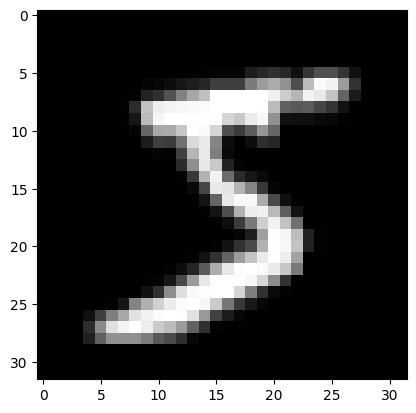

In [ ]:
plt.imshow(train_dataset[0][0][0], cmap="gray")


In [ ]:
class Lenet5(torch.nn.Module):
  def __init__(self):
    super(Lenet5 , self ).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1 , out_channels=6 , stride=1 , padding=0, kernel_size=5)
    self.sub2 = torch.nn.MaxPool2d(kernel_size=2)
    self.conv3 = torch.nn.Conv2d(in_channels=6, out_channels=16, stride=1, padding=0, kernel_size=5)
    self.sub4 = torch.nn.MaxPool2d(kernel_size=2)
    self.fc5 = torch.nn.Linear(400 , 120)
    self.fc6 = torch.nn.Linear(120 , 84)
    self.out = torch.nn.Linear(84 , 10)
  def forward(self , x):
    x = self.conv1(x)
    x = self.sub2(x)
    x = self.conv3(x)
    x = self.sub4(x)
    x = x.view(x.shape[0] , -1)
    # print(view.shape)
    x = self.fc5(x)
    x = self.fc6(x)
    x = self.out(x)
    return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
data_loader = DataLoader(train_dataset , batch_size = 64)
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3
model = Lenet5()
model = model.to(device=device)
optim = torch.optim.Adam(model.parameters() , lr = learning_rate)
for epoch in range(10):
  losses = []
  for data , label in data_loader:
    data = data.to(device=device)
    label = label.to(device=device)
    output = model(data)
    loss = loss_fn(output , label)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.item())
  print(sum(losses) / len(losses))
    # print(output.shape)
    # break

cuda
0.24886983116991374
0.09578027176834059
0.07520279177458464
0.06536090899546664
0.05893674364302872
0.05444137079199143
0.05013918915072452
0.04716996376786239
0.04450299837293281
0.04157713004164672
